In [1]:
### importare pandas, seaborn e matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### IMPORT DEI DATI

I dati sono nella cartella in formato .csv, sotto il nome 'cars.csv'. Caricare il csv in DataFrame Pandas. NB. il dataset originale è disponibile qui: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

In [3]:
### importare i dati con pd.read_csv()
df = pd.read_csv("Roberto Montaguti - cars.csv")
df.shape
 

(7906, 15)

### TRAIN/TEST SPLIT

In [4]:
# importare train_test_split da sklearn.model_selection
from sklearn.model_selection import train_test_split

In [5]:
# Dividere il dataset in train/test set, utilizzando una test_size=0.25, shuffle=True, random_state=22
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22)

### FEATURES & TARGET

In [7]:
### creare X_train e X_test selezionando solo le features 'km_driven','mileage','max_power','seats'
features =['km_driven','mileage','max_power','seats']
X_train =train_df[features].copy()
X_test=test_df[features].copy()

In [8]:
### creare y_train e y_test, il nome del target è 'selling_price'
y_train =train_df["selling_price"].copy()
y_test =test_df["selling_price"].copy()

### FITTING

In [9]:
### importare RandomForestRegressor da sklearn.ensamble
from sklearn.ensemble import RandomForestRegressor

In [10]:
### eseguire il fitting del modello sul train_df, usando la funzione .fit()
model = RandomForestRegressor()
model = model.fit(X=X_train, y=y_train)

### PREDICTION

In [11]:
### fare previsioni sia sul train_df che sul test_df usando la funzione .predict()
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

### EVALUATION

In [12]:
### importare mean_absolute_error e r2_score da sklearn.metrics
from sklearn.metrics import mean_absolute_error,  r2_score

In [20]:
### calcolare MAE e R2 del modello sia sul train_set che sul test_set, e poi printarli
def evaluate(targets, preds, title, plots=True, verbose=True):

       
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

TRAIN SET
MAE:  49061.27607069771
R2:  0.9908516745483011


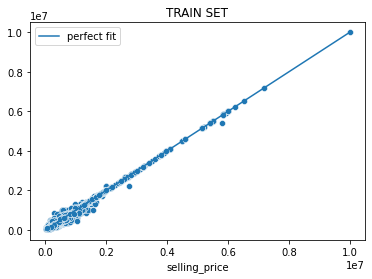

TEST SET
MAE:  103257.11082305302
R2:  0.9012798260467758


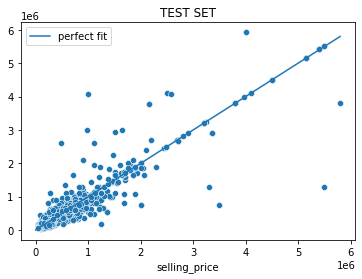

In [22]:
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', verbose=True)
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', verbose=True)


### TUNING

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
### Provare a trovare un buon valore di max_depth
depth_list = range(1,8,1)

train_r2_list = list()
test_r2_list = list()

for n in depth_list:
    
    print('\nMax_depth:',n)
    
    model = DecisionTreeRegressor(max_depth=n)
    model = model.fit(X=X_train, y=y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # usiamo la funzione che abbiamo definito prima
    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]


Max_depth: 1
TRAIN SET
MAE:  310662.30728732655
R2:  0.6055413476397562
TEST SET
MAE:  315684.0533231313
R2:  0.5443952014315365

Max_depth: 2
TRAIN SET
MAE:  273159.04112802807
R2:  0.7484175583449248
TEST SET
MAE:  268140.83805640135
R2:  0.738267272094717

Max_depth: 3
TRAIN SET
MAE:  215239.11222850962
R2:  0.8309608781010553
TEST SET
MAE:  210648.04893025238
R2:  0.8217845091082128

Max_depth: 4
TRAIN SET
MAE:  197384.2107929329
R2:  0.8624571004687014
TEST SET
MAE:  198294.58873763026
R2:  0.8341558385309331

Max_depth: 5
TRAIN SET
MAE:  170021.5603061898
R2:  0.9007330112220456
TEST SET
MAE:  172155.6919159322
R2:  0.8725716326896173

Max_depth: 6
TRAIN SET
MAE:  149240.89241156253
R2:  0.9275520542048903
TEST SET
MAE:  158866.15011643665
R2:  0.8782954367320639

Max_depth: 7
TRAIN SET
MAE:  128768.59461818013
R2:  0.9466739064853124
TEST SET
MAE:  140708.94068926622
R2:  0.8866634278202049


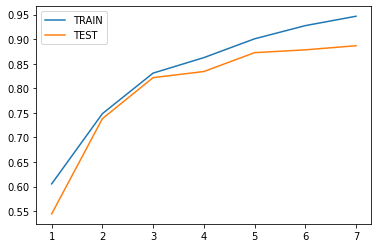

In [30]:
plt.plot(depth_list, train_r2_list, label='TRAIN')
plt.plot(depth_list, test_r2_list, label='TEST')
plt.legend()
plt.show()

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
